In [1]:
### GENERAL ###

# Disabling warnings, to make the notebook better to read.
import warnings
warnings.filterwarnings('ignore')

# Importing pandas and numpy
import pandas as pd
import numpy as np
pd.options.display.max_rows = 6

In [2]:
### HAPPYNESS SCORE DATASETS ###

# Reading in happyness score datasets
happy_2015_df = pd.read_csv("2015.csv")
happy_2016_df = pd.read_csv("2016.csv")
happy_2017_df = pd.read_csv("2017.csv")
happy_2018_df = pd.read_csv("2018.csv")
happy_2019_df = pd.read_csv("2019.csv")

# Adding the variable "year"
happy_2015_df["year"] = 2015
happy_2016_df["year"] = 2016
happy_2017_df["year"] = 2017
happy_2018_df["year"] = 2018
happy_2019_df["year"] = 2019

# Choosing variables "rank", "country", "score",  "year" from the datasets
happy_2015 = happy_2015_df.iloc[:, [0, 2, 3, 12]]
happy_2015.columns = ["country", "rank", "score", "year"]
happy_2016 = happy_2016_df.iloc[:, [0, 2, 3, 13]]
happy_2016.columns = ["country", "rank", "score", "year"]
happy_2017 = happy_2017_df.iloc[:, [0, 1, 2, 12]]
happy_2017.columns = ["country", "rank", "score", "year"]

happy_2018 = happy_2018_df.iloc[:, [0, 1, 2, 9]]
happy_2018.columns = ["rank", "country", "score",  "year"]
happy_2018 = happy_2018[["country", "rank", "score", "year"]]

happy_2019 = happy_2019_df.iloc[:, [0, 1, 2, 9]]
happy_2019.columns = ["rank", "country", "score", "year"]
happy_2019 = happy_2019[["country", "rank", "score", "year"]]

# Joining datasets
happy = pd.concat([happy_2015, happy_2016, happy_2017, happy_2018, happy_2019], axis=0)
happy = happy.reset_index(drop=True) # Fixing indexes

# Replacing some country names to match in the happy dataset
happy["country"] = happy["country"].replace("Hong Kong S.A.R., China", "Hong Kong")
happy["country"] = happy["country"].replace("Northern Cyprus", "North Cyprus")
happy["country"] = happy["country"].replace("Taiwan Province of China", "Taiwan")
happy["country"] = happy["country"].replace("Trinidad and Tobago", "Trinidad & Tobago")
happy["country"] = happy["country"].replace("Congo (Kinshasa)", "Democratic Republic of the Congo")
happy["country"] = happy["country"].replace("Congo (Brazzaville)", "Republic of the Congo")

# Checking again what we are missing and removing the countries that don't have data about all of the years.
loendus = happy.groupby('country').count()
loendus = loendus["rank"]
loendus = loendus[loendus < 5]
puudulikud = loendus.index.tolist()
happy = happy[~happy['country'].isin(puudulikud)]

happy

,country,rank,score,year
0,Switzerland,1,7.587,2015
1,Iceland,2,7.561,2015
2,Denmark,3,7.527,2015
...,...,...,...,...
777,Rwanda,152,3.334,2019
778,Tanzania,153,3.231,2019
779,Afghanistan,154,3.203,2019


In [3]:
### GDP DATASET ####


# Reading in the dataset
GDP_df = pd.read_csv("GDP.csv", delimiter=";", encoding = "latin_1")

# Extracting columns
riigid = happy["country"].unique().tolist()
GDP = GDP_df[GDP_df['Country'].isin(riigid)] # Choosing the countries that appear in the happiness dataset
GDP = GDP.iloc[:,[0, 5,6,7,8,9]]

# Checking which countries were left out
riigid2 = GDP["Country"].tolist()
valja = set(riigid).difference(set(riigid2))
valja

# Fixing country names
GDP_df["Country"] = GDP_df["Country"].replace("Korea", "South Korea")
GDP_df["Country"] = GDP_df["Country"].replace("Trinidad and Tobago", "Trinidad & Tobago")

# Making the final cut with fixed names
GDP = GDP_df[GDP_df['Country'].isin(riigid)]
GDP = GDP.iloc[:,[0, 5,6,7,8,9]]
GDP

,Country,2015,2016,2017,2018,2019
0,Canada,51354.11,51692.88,52878.20,53484.24,53825.74
1,United States,52005.17,52525.15,53296.58,54421.19,55380.25
3,Mexico,10047.21,10218.34,10309.09,10399.11,10343.58
...,...,...,...,...,...,...
176,Tanzania,853.81,887.46,921.89,943.58,974.75
177,Uganda,659.46,669.04,672.92,691.47,709.58
178,Zambia,1729.42,1742.98,1750.25,1764.41,1758.14


In [4]:
# Joining GDP and happyness score datasets
happy2 = happy[happy['country'].isin(GDP["Country"].tolist())] 
happy2["GDP"] = 0
# Cycle finds the correct country and year to add in the GDP column
for i in range(0, happy2.shape[0]):
    aasta = happy2.iloc[i, 3]
    riik = happy2.iloc[i, 0]
    aasta_andmed = GDP[["Country", str(aasta)]]
    rida = aasta_andmed[aasta_andmed["Country"] == riik]
    happy2.iloc[i, 4] = round(float(rida[str(aasta)]), 0)
happy2

,country,rank,score,year,GDP
0,Switzerland,1,7.587,2015,78066.0
1,Iceland,2,7.561,2015,47248.0
2,Denmark,3,7.527,2015,61506.0
...,...,...,...,...,...
777,Rwanda,152,3.334,2019,871.0
778,Tanzania,153,3.231,2019,975.0
779,Afghanistan,154,3.203,2019,595.0


In [5]:
### HDI dataset ###

# Reading in and extracting columns
HDI_df = pd.read_csv("HDI.csv", delimiter=";")
riigid = happy2["country"].unique().tolist()
HDI = HDI_df[HDI_df['Country'].isin(riigid)]
HDI

# Checking which countries were left out
riigid2 = HDI["Country"].tolist()
valja = set(riigid).difference(set(riigid2))
valja

# Fixing names
HDI_df["Country"] = HDI_df["Country"].replace("Congo", "Republic of the Congo")

# Making the final cut with fixed names
HDI = HDI_df[HDI_df['Country'].isin(riigid)]
HDI


,Country,2015,2016,2017,2018,2019
0,Afghanistan,0.490,0.491,0.493,0.496,0.496
1,Albania,0.788,0.788,0.789,0.791,0.791
2,Algeria,0.751,0.755,0.758,0.759,0.759
...,...,...,...,...,...,...
185,Vietnam,0.680,0.685,0.690,0.693,0.693
186,Yemen,0.493,0.477,0.463,0.463,0.463
187,Zambia,0.570,0.580,0.589,0.591,0.591


In [6]:
# Adding HDI column to the general dataset (happyness score + GDP)
happy3 = happy2[happy2['country'].isin(HDI["Country"].tolist())] 
happy3["HDI"] = 0
for i in range(0, happy3.shape[0]):
    aasta = happy3.iloc[i, 3]
    riik = happy3.iloc[i, 0]
    aasta_andmed = HDI[["Country", str(aasta)]]
    rida = aasta_andmed[aasta_andmed["Country"] == riik]
    happy3.iloc[i, 5] = float(rida[str(aasta)])
happy3

,country,rank,score,year,GDP,HDI
0,Switzerland,1,7.587,2015,78066.0,0.943
1,Iceland,2,7.561,2015,47248.0,0.927
2,Denmark,3,7.527,2015,61506.0,0.926
...,...,...,...,...,...,...
777,Rwanda,152,3.334,2019,871.0,0.536
778,Tanzania,153,3.231,2019,975.0,0.528
779,Afghanistan,154,3.203,2019,595.0,0.496


In [7]:
### Inequality dataset ### 

# Reading in and extracting columns
inequality_df = pd.read_csv("inequality.csv", delimiter=";")
riigid = happy3["country"].unique().tolist()
inequality = inequality_df[inequality_df['Country'].isin(riigid)]
inequality

# Checking which countries were left out
riigid2 = inequality["Country"].tolist()
valja = set(riigid).difference(set(riigid2))
valja

# Fixing names
inequality_df["Country"] = HDI_df["Country"].replace("Congo", "Republic of the Congo")

# Making the final cut with fixed names
inequality = inequality_df[inequality_df['Country'].isin(riigid)]

# let's use 2018 data for 2019, as 2019 is missing
inequality["2019"] = inequality["2018"]

# Fixing NaN values
koik_na = list()

# Finding all the countries that have all NaN values
for i in range(0, inequality.shape[0]):
    if inequality.iloc[i, 1:6].isnull().all():
        koik_na.append(inequality.iloc[i, 0])

# Replacing NaN values with previous year index, following year index or the mean of all the available indexes of a country.
for i in range(0, inequality.shape[0]):
    for j in range(1, 6):
        keskmine = round(inequality.iloc[i, 1:6].mean(), 1)
        if pd.isna(inequality.iloc[i, j]):
            if j != 1:
                if not pd.isna(inequality.iloc[i, j-1]):
                    inequality.iloc[i, j] = inequality.iloc[i, j-1]
            if j != 5:
                if not pd.isna(inequality.iloc[i, j+1]):
                    inequality.iloc[i, j] = inequality.iloc[i, j+1]
        if pd.isna(inequality.iloc[i, j]):
            inequality.iloc[i, j] = keskmine

# Removing the countries with all NaN values
riigid = inequality["Country"].tolist()
alles =  set(riigid).difference(set(koik_na))
inequality = inequality[inequality['Country'].isin(alles)]
inequality
            


,Country,2015,2016,2017,2018,2019
0,Afghanistan,30.4,28.2,28.2,28.2,28.2
1,Albania,13.4,12.2,10.0,10.9,10.9
2,Algeria,19.8,20.1,20.1,19.7,19.7
...,...,...,...,...,...,...
185,Vietnam,20.2,16.6,15.5,16.7,16.7
186,Yemen,29.9,28.7,26.4,26.7,26.7
187,Zambia,31.6,30.9,31.5,31.5,31.5


In [8]:
# Adding inequality column to the general dataset
happy4 = happy3[happy3['country'].isin(inequality["Country"].tolist())] 
happy4["inequality"] = 0
for i in range(0, happy4.shape[0]):
    aasta = happy4.iloc[i, 3]
    riik = happy4.iloc[i, 0]
    aasta_andmed = inequality[["Country", str(aasta)]]
    rida = aasta_andmed[aasta_andmed["Country"] == riik]
    happy4.iloc[i, 6] = float(rida[str(aasta)])
happy4

,country,rank,score,year,GDP,HDI,inequality
0,Switzerland,1,7.587,2015,78066.0,0.943,36.6
1,Iceland,2,7.561,2015,47248.0,0.927,39.2
2,Denmark,3,7.527,2015,61506.0,0.926,10.8
...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,2019,871.0,0.536,13.5
778,Tanzania,153,3.231,2019,975.0,0.528,4.7
779,Afghanistan,154,3.203,2019,595.0,0.496,28.2


In [9]:
### POPULATION DATASET ###
pop_df = pd.read_csv("POP.csv")
pop_df = pop_df.iloc[:, [2,4,5,6,7,8]]
pop_df.columns = ["Country", "2015", "2016", "2017", "2018", "2019"]
riigid = happy4["country"].unique().tolist()
pop = pop_df[pop_df['Country'].isin(riigid)]
pop


,Country,2015,2016,2017,2018,2019
0,Afghanistan,34413603,35383128,36296400,37172386,38041754
1,Albania,2880703,2876101,2873457,2866376,2854191
2,Algeria,39728025,40551404,41389198,42228429,43053054
...,...,...,...,...,...,...
208,Uzbekistan,31298900,31847900,32388600,32956100,33580650
211,Vietnam,92677076,93638724,94596642,95540395,96462106
215,Zambia,15879361,16363507,16853688,17351822,17861030


In [10]:
# Adding population column to the general dataset

happy5 = happy4[happy4['country'].isin(pop["Country"].tolist())] 
happy5["population"] = 0
for i in range(0, happy5.shape[0]):
    aasta = happy5.iloc[i, 3]
    riik = happy5.iloc[i, 0]
    aasta_andmed = pop[["Country", str(aasta)]]
    rida = aasta_andmed[aasta_andmed["Country"] == riik]
    happy5.iloc[i, 7] = round(float(rida[str(aasta)]), 0)
happy5

,country,rank,score,year,GDP,HDI,inequality,population
0,Switzerland,1,7.587,2015,78066.0,0.943,36.6,8282396.0
1,Iceland,2,7.561,2015,47248.0,0.927,39.2,330815.0
2,Denmark,3,7.527,2015,61506.0,0.926,10.8,5683483.0
...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,2019,871.0,0.536,13.5,12626950.0
778,Tanzania,153,3.231,2019,975.0,0.528,4.7,58005463.0
779,Afghanistan,154,3.203,2019,595.0,0.496,28.2,38041754.0


In [11]:
# Adding region to the general dataset

# Extracting new data with columns attatched
regions = happy_2015_df.iloc[:, [0, 1]]
regions.columns = ["country", "region"]

# Fixing country names
regions["country"] = regions["country"].replace("Trinidad and Tobago", "Trinidad & Tobago")
regions["country"] = regions["country"].replace("Congo (Kinshasa)", "Democratic Republic of the Congo")
regions["country"] = regions["country"].replace("Hong Kong S.A.R., China", "Hong Kong")
regions["country"] = regions["country"].replace("Northern Cyprus", "North Cyprus")
regions["country"] = regions["country"].replace("Taiwan Province of China", "Taiwan")
regions["country"] = regions["country"].replace("Congo (Brazzaville)", "Republic of the Congo")

# Extracting the countries that we have in the general dataset
riigid = happy5["country"].unique().tolist()
regions = regions[regions['country'].isin(riigid)]

# Checking what countries were left out
riigid2 = regions["country"].tolist()
valja = set(riigid).difference(set(riigid2))
valja

# Merging the regions with general dataset
result = pd.merge(happy5, regions, on='country')
result = result.sort_values('region').reset_index()
region_dummy = pd.get_dummies(result["region"]) # One-hot encoding the region variable.

# Logarithming GDP and population
happy5["GDP"] = np.log10(happy5["GDP"])
happy5["population"] = np.log10(happy5["population"])
data_final = pd.concat([happy5.reset_index(drop=True), region_dummy], axis = 1)
data_final

,country,rank,score,year,GDP,HDI,inequality,population,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Switzerland,1,7.587,2015,4.892462,0.943,36.6,6.918156,1,0,0,0,0,0,0,0,0,0
1,Iceland,2,7.561,2015,4.674383,0.927,39.2,5.519585,1,0,0,0,0,0,0,0,0,0
2,Denmark,3,7.527,2015,4.788917,0.926,10.8,6.754615,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,Rwanda,152,3.334,2019,2.940018,0.536,13.5,7.101298,0,0,0,0,0,0,0,0,0,1
538,Tanzania,153,3.231,2019,2.989005,0.528,4.7,7.763469,0,0,0,0,0,0,0,0,0,1
539,Afghanistan,154,3.203,2019,2.774517,0.496,28.2,7.580261,0,0,0,0,0,0,0,0,0,1


In [12]:
## MODELLING ###

# Extracting variables
happy_X = data_final[["GDP", "HDI", "inequality", "population", "Australia and New Zealand", "Central and Eastern Europe",
                  "Eastern Asia", "Latin America and Caribbean", "Middle East and Northern Africa", 
                 "North America", "Southeastern Asia", "Southern Asia", "Sub-Saharan Africa", "Western Europe"]]
happy_y = data_final["score"]

import statsmodels.api as sm

# Making a linear regression model
happy_X = sm.add_constant(happy_X)
model = sm.OLS(happy_y, happy_X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     112.2
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          3.00e-142
Time:                        20:19:37   Log-Likelihood:                -479.71
No. Observations:                 540   AIC:                             987.4
Df Residuals:                     526   BIC:                             1048.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [13]:
# Removing "inequality" from the model, because it was over the significace threshold.

# Extracting variables
happy_X2 = data_final[["GDP", "HDI", "population", "Australia and New Zealand", "Central and Eastern Europe",
                  "Eastern Asia", "Latin America and Caribbean", "Middle East and Northern Africa", 
                 "North America", "Southeastern Asia", "Southern Asia", "Sub-Saharan Africa", "Western Europe"]]
happy_y2 = data_final["score"]

import statsmodels.api as sm

# Making a linear regression model
happy_X2 = sm.add_constant(happy_X2)
model2 = sm.OLS(happy_y2, happy_X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     121.0
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          9.06e-143
Time:                        20:19:37   Log-Likelihood:                -480.98
No. Observations:                 540   AIC:                             988.0
Df Residuals:                     527   BIC:                             1044.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [14]:
### VISUALISATIONS ###

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharey= True, figsize = (10,10))
ax1.scatter(happy5.GDP, happy5.score)
ax1.set(xlabel = "GDP")
ax2.scatter(happy5.HDI, happy5.score)
ax2.set(xlabel = "Human development index", ylabel = "Happiness score")
ax3.scatter(happy5.inequality, happy5.score)
ax3.set(xlabel = "Inequality index")
ax4.scatter(happy5.population, happy5.score)
ax4.set(xlabel = "Population")


[Text(0.5, 0, 'Population')]

Text(0, 0.5, 'Happiness score')

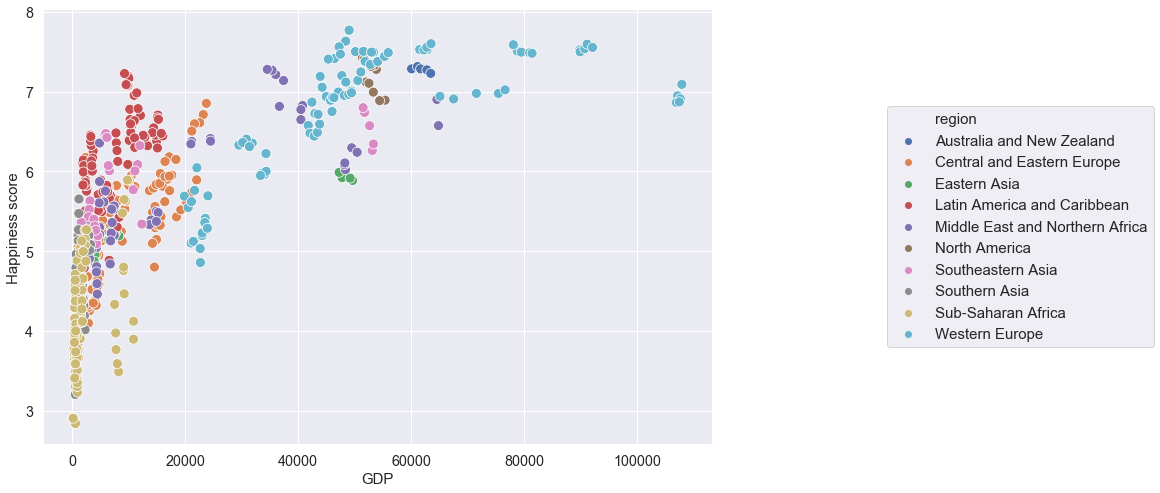

In [15]:
# Happiness score and GDP scatterplot
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.set(font_scale = 1.3)

g = sns.scatterplot('GDP', 'score', data=result, hue='region', s=100)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1,fontsize=15)
g.set_xlabel("GDP",fontsize=15)
g.set_ylabel("Happiness score",fontsize=15)

Text(0, 0.5, 'Happiness score')

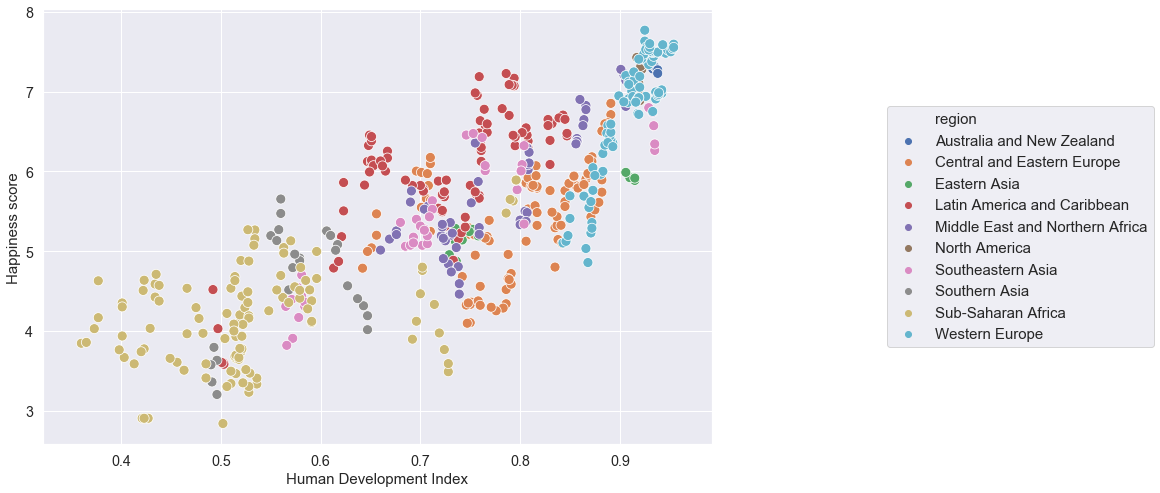

In [16]:
# Happiness score and HDI scatterplot
fig = plt.gcf()
fig.set_size_inches(12, 8)
g = sns.scatterplot('HDI', 'score', data=result, hue='region', s=100)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1,fontsize=15)
g.set_xlabel("Human Development Index",fontsize=15)
g.set_ylabel("Happiness score",fontsize=15)

Text(0, 0.5, 'Happiness score')

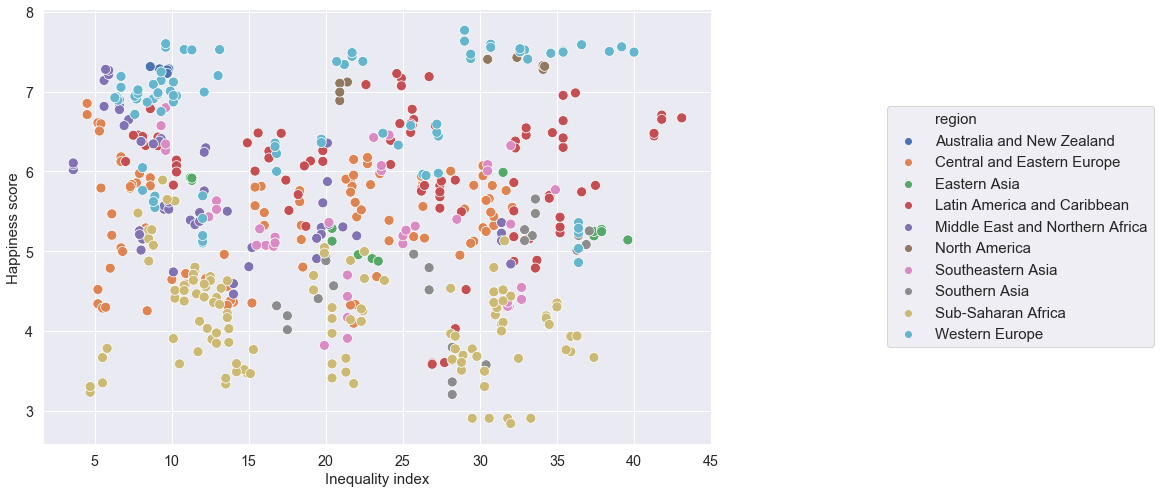

In [17]:
# Happiness score and inequality index scatterplot
fig = plt.gcf()
fig.set_size_inches(12, 8)
g = sns.scatterplot('inequality', 'score', data=result, hue='region', s=100)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1,fontsize=15)
g.set_xlabel("Inequality index",fontsize=15)
g.set_ylabel("Happiness score",fontsize=15)

(3.8, 7.8)

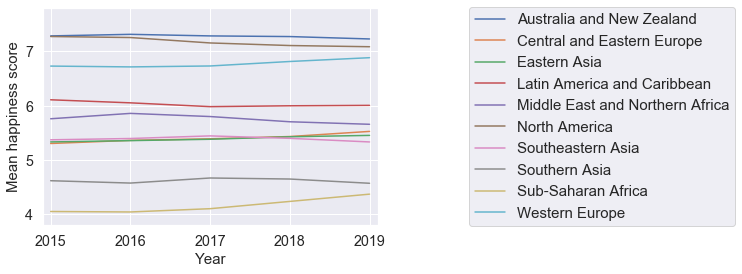

In [18]:
# Time series of mean happiness score by region
res = result.groupby(['region', 'year'])['score'].mean().reset_index()
g = res.pivot_table(index='year',columns='region',values='score',aggfunc='sum').plot()
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1,fontsize=15)
g.set_xlabel("Year",fontsize=15)
g.set_ylabel("Mean happiness score",fontsize=15)
plt.xlim(2014.9, 2019.1)
plt.ylim(3.8, 7.8)

Text(0, 0.5, 'Happiness score')

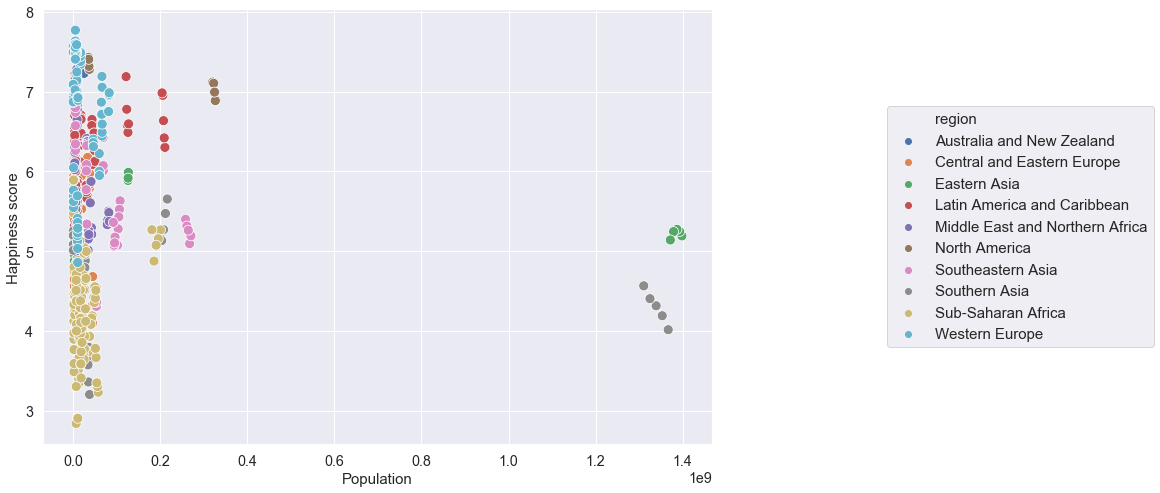

In [19]:
# Happiness score and population scatterplot

fig = plt.gcf()
fig.set_size_inches(12, 8)
g = sns.scatterplot('population', 'score', data=result, hue='region', s=100)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1,fontsize=15)
g.set_xlabel("Population",fontsize=15)
g.set_ylabel("Happiness score",fontsize=15)